<a href="https://colab.research.google.com/github/intimanjunath/deep-learning-tensor-Operations/blob/main/PyTorch_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# PyTorch: Tensor Operations Practice
import torch
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, reduce, repeat

# Set seeds for reproducibility
torch.manual_seed(123)
np.random.seed(123)

In [3]:
#Creating Basic Tensors
# Define a scalar, vector, matrix, and a 3D tensor using torch.rand
pt_scalar = torch.tensor(9, dtype=torch.int32)
pt_vector = torch.tensor([0.2, 1.0, 1.8], dtype=torch.float32)
pt_matrix = torch.tensor([[2.5, 3.5], [4.5, 5.5]], dtype=torch.float64)
pt_tensor3d = torch.rand(3, 4, 5)

print("PyTorch 3D Tensor Properties:")
print("Shape:", pt_tensor3d.shape)
print("Data Type:", pt_tensor3d.dtype)
print("Number of Dimensions:", pt_tensor3d.ndimension())

# Casting Tensor Types
# Convert the vector to float64
pt_vector_cast = pt_vector.to(dtype=torch.float64)
print("\nCasted pt_vector dtype:", pt_vector_cast.dtype)


PyTorch 3D Tensor Properties:
Shape: torch.Size([3, 4, 5])
Data Type: torch.float32
Number of Dimensions: 3

Casted pt_vector dtype: torch.float64


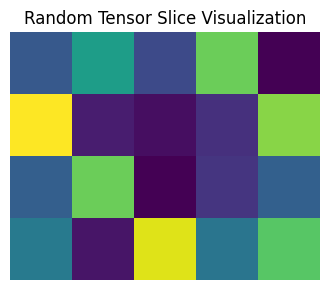

In [4]:
# Visualizing Tensors
# Display the first 2D slice of the 3D tensor
plt.figure(figsize=(4, 4))
plt.imshow(pt_tensor3d[0].numpy(), cmap='viridis')
plt.title("Random Tensor Slice Visualization")
plt.axis('off')
plt.show()


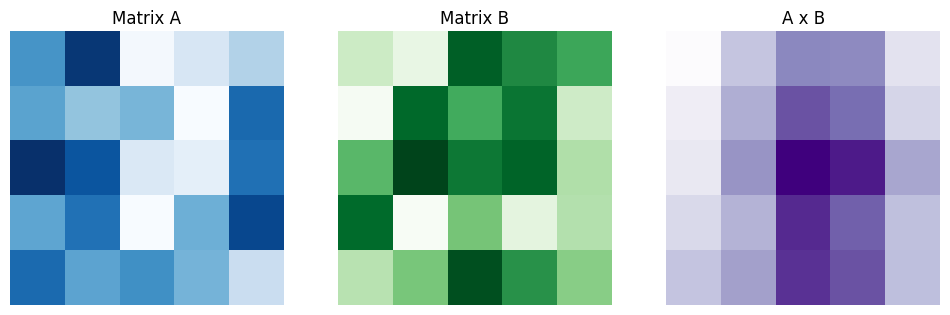

In [5]:
# Matrix Multiplication Visualization
# Create two random 5x5 matrices and multiply them
A_pt = torch.rand(5, 5)
B_pt = torch.rand(5, 5)
prod_pt = torch.matmul(A_pt, B_pt)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(A_pt.numpy(), cmap='Blues')
axs[0].set_title("Matrix A")
axs[0].axis('off')
axs[1].imshow(B_pt.numpy(), cmap='Greens')
axs[1].set_title("Matrix B")
axs[1].axis('off')
axs[2].imshow(prod_pt.numpy(), cmap='Purples')
axs[2].set_title("A x B")
axs[2].axis('off')
plt.show()

In [6]:
#Basic Arithmetic Operations
pt_add = pt_vector + 5
pt_sub = pt_vector - 1
pt_mul = pt_vector * 3
pt_div = pt_vector / 2

print("\nPyTorch Arithmetic Operations:")
print("Addition:", pt_add.numpy())
print("Subtraction:", pt_sub.numpy())
print("Multiplication:", pt_mul.numpy())
print("Division:", pt_div.numpy())


PyTorch Arithmetic Operations:
Addition: [5.2 6.  6.8]
Subtraction: [-0.8         0.          0.79999995]
Multiplication: [0.6       3.        5.3999996]
Division: [0.1 0.5 0.9]


In [7]:
#Einsum Operations
# Define two 2x2 matrices for einsum demonstrations
mat_A_pt = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
mat_B_pt = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

einsum_product_pt = torch.einsum('ik,kj->ij', mat_A_pt, mat_B_pt)
einsum_total_pt = torch.einsum('ij->', mat_A_pt)
einsum_elementwise_pt = torch.einsum('ij,ij->ij', mat_A_pt, mat_B_pt)
einsum_outer_pt = torch.einsum('i,j->ij', pt_vector, pt_vector)

print("\nPyTorch Einsum Operations:")
print("Matrix Product (einsum):\n", einsum_product_pt.numpy())
print("Sum of all elements in mat_A_pt:", einsum_total_pt.item())
print("Element-wise multiplication:\n", einsum_elementwise_pt.numpy())
print("Outer product of pt_vector:\n", einsum_outer_pt.numpy())


PyTorch Einsum Operations:
Matrix Product (einsum):
 [[19. 22.]
 [43. 50.]]
Sum of all elements in mat_A_pt: 10.0
Element-wise multiplication:
 [[ 5. 12.]
 [21. 32.]]
Outer product of pt_vector:
 [[0.04       0.2        0.35999998]
 [0.2        1.         1.8       ]
 [0.35999998 1.8        3.2399998 ]]


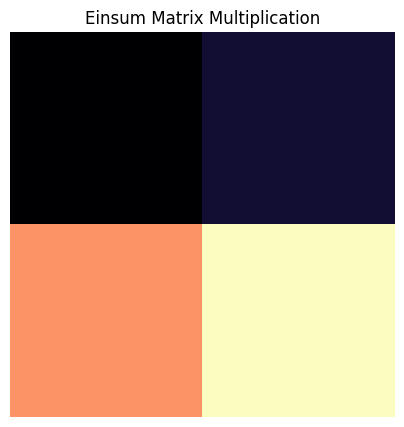

In [8]:
# Visualize the einsum matrix multiplication result
plt.figure(figsize=(5, 5))
plt.imshow(einsum_product_pt.numpy(), cmap='magma')
plt.title("Einsum Matrix Multiplication")
plt.axis('off')
plt.show()


In [9]:
# Using einops for Tensor Manipulations
# Rearrange: move the first axis to the end
rearranged_pt = rearrange(pt_tensor3d, 'b h w -> h w b')
print("\nRearranged Tensor Shape:", rearranged_pt.shape)

# Reduce: compute the mean across the last dimension
reduced_pt = reduce(pt_tensor3d, 'b h w -> b h', 'mean')
print("Reduced Tensor Shape:", reduced_pt.shape)

# Repeat: replicate pt_vector to form a 2D tensor with width 4
repeated_pt = repeat(pt_vector, 'h -> h w', w=4)
print("Repeated Tensor Shape:", repeated_pt.shape)


Rearranged Tensor Shape: torch.Size([4, 5, 3])
Reduced Tensor Shape: torch.Size([3, 4])
Repeated Tensor Shape: torch.Size([3, 4])


In [10]:
# Advanced Tensor Manipulations
# Reshape the 3D tensor to a 2D tensor
reshaped_pt = pt_tensor3d.view(pt_tensor3d.size(0) * pt_tensor3d.size(1), pt_tensor3d.size(2))
# Slice: take the first 2 elements along the second dimension
sliced_pt = pt_tensor3d[:, :2, :]
# Concatenate and stack using pt_matrix
concat_pt = torch.cat([pt_matrix, pt_matrix], dim=0)
stack_pt = torch.stack([pt_matrix, pt_matrix], dim=0)

# Create an identity matrix and a diagonal matrix; compute trace, norm, and rank
identity_pt = torch.eye(3)
diag_pt = torch.diag(torch.tensor([10, 20, 30], dtype=torch.float64))
trace_pt = torch.trace(pt_matrix)
norm_pt = torch.norm(pt_matrix)
rank_pt = len(pt_matrix.shape)

In [11]:
# Eigen decomposition on a symmetric matrix
sym_matrix_pt = torch.tensor([[6.0, 2.0], [2.0, 3.0]], dtype=torch.float32)
eigvals_pt, eigvecs_pt = torch.linalg.eig(sym_matrix_pt)

print("\nPyTorch Advanced Operations:")
print("Reshaped Tensor Shape:", reshaped_pt.shape)
print("Sliced Tensor Shape:", sliced_pt.shape)
print("Concatenated Matrix Shape:", concat_pt.shape)
print("Stacked Matrix Shape:", stack_pt.shape)
print("Identity Matrix:\n", identity_pt.numpy())
print("Diagonal Matrix:\n", diag_pt.numpy())
print("Trace of pt_matrix:", trace_pt.item())
print("Norm of pt_matrix:", norm_pt.item())
print("Rank of pt_matrix:", rank_pt)
print("Eigenvalues (may be complex):\n", eigvals_pt)
print("Eigenvectors:\n", eigvecs_pt)


PyTorch Advanced Operations:
Reshaped Tensor Shape: torch.Size([12, 5])
Sliced Tensor Shape: torch.Size([3, 2, 5])
Concatenated Matrix Shape: torch.Size([4, 2])
Stacked Matrix Shape: torch.Size([2, 2, 2])
Identity Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Diagonal Matrix:
 [[10.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0. 30.]]
Trace of pt_matrix: 8.0
Norm of pt_matrix: 8.306623862918075
Rank of pt_matrix: 2
Eigenvalues (may be complex):
 tensor([7.+0.j, 2.+0.j])
Eigenvectors:
 tensor([[ 0.8944+0.j, -0.4472+0.j],
        [ 0.4472+0.j,  0.8944+0.j]])



PyTorch Broadcasting Result:
[[2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]


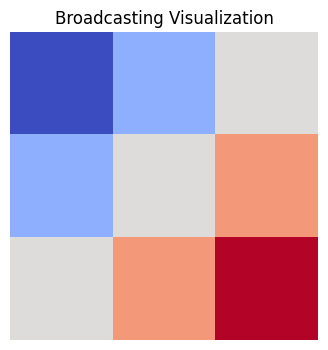

In [12]:
# Broadcasting Example
pt_A = torch.tensor([1, 2, 3], dtype=torch.float32)
pt_B = torch.tensor([[1], [2], [3]], dtype=torch.float32)
broadcast_result_pt = pt_A + pt_B

print("\nPyTorch Broadcasting Result:")
print(broadcast_result_pt.numpy())

plt.figure(figsize=(4, 4))
plt.imshow(broadcast_result_pt.numpy(), cmap='coolwarm')
plt.title("Broadcasting Visualization")
plt.axis('off')
plt.show()

In [13]:
#Gradient Computation
# Compute the gradient of a quadratic function in PyTorch
x_pt = torch.tensor(4.0, requires_grad=True)
y_pt = x_pt**2 + 3 * x_pt + 7
y_pt.backward()
print("\nPyTorch Gradient Computation:")
print("dy/dx at x=4:", x_pt.grad.item())


PyTorch Gradient Computation:
dy/dx at x=4: 11.0
